In [1]:
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
from pprint import pprint


In [9]:
data_dir = r"C:\Users\yrliu98\Desktop\2025_04_04_Cyerene_test"

txt_files = list(Path(data_dir).glob('*.txt'))

pprint(txt_files)

[WindowsPath('C:/Users/yrliu98/Desktop/2025_04_04_Cyerene_test/Cyrene_100C_front.txt'),
 WindowsPath('C:/Users/yrliu98/Desktop/2025_04_04_Cyerene_test/Cyrene_CB_back.txt'),
 WindowsPath('C:/Users/yrliu98/Desktop/2025_04_04_Cyerene_test/Cyrene_CB_front.txt'),
 WindowsPath('C:/Users/yrliu98/Desktop/2025_04_04_Cyerene_test/Cyrene_RT_front.txt'),
 WindowsPath('C:/Users/yrliu98/Desktop/2025_04_04_Cyerene_test/rac_ACN_front.txt')]


In [10]:
dfs = []
for txt_file in txt_files:
    df = pd.read_csv(txt_file, sep="\t", names=["wavelength", "CD", "HT", "abs"], skiprows=21, nrows=400)
    dfs.append({"name": txt_file.stem, **df.to_dict(orient='list'), "df":df })

double_side_samples = [df['df'] for df in dfs if ("Cyrene_CB_" in df["name"])]

genuine_df = double_side_samples[0].merge(double_side_samples[1], on="wavelength")

genuine_df["genuine_CD"] = (genuine_df["CD_x"] + genuine_df["CD_y"]) / 2

genuine_df["avg_abs"] = (genuine_df["abs_x"] + genuine_df["abs_y"]) / 2

to_exclude = [0, 1, 2, 3]

for i in sorted(to_exclude, reverse=True):
    dfs.pop(i)

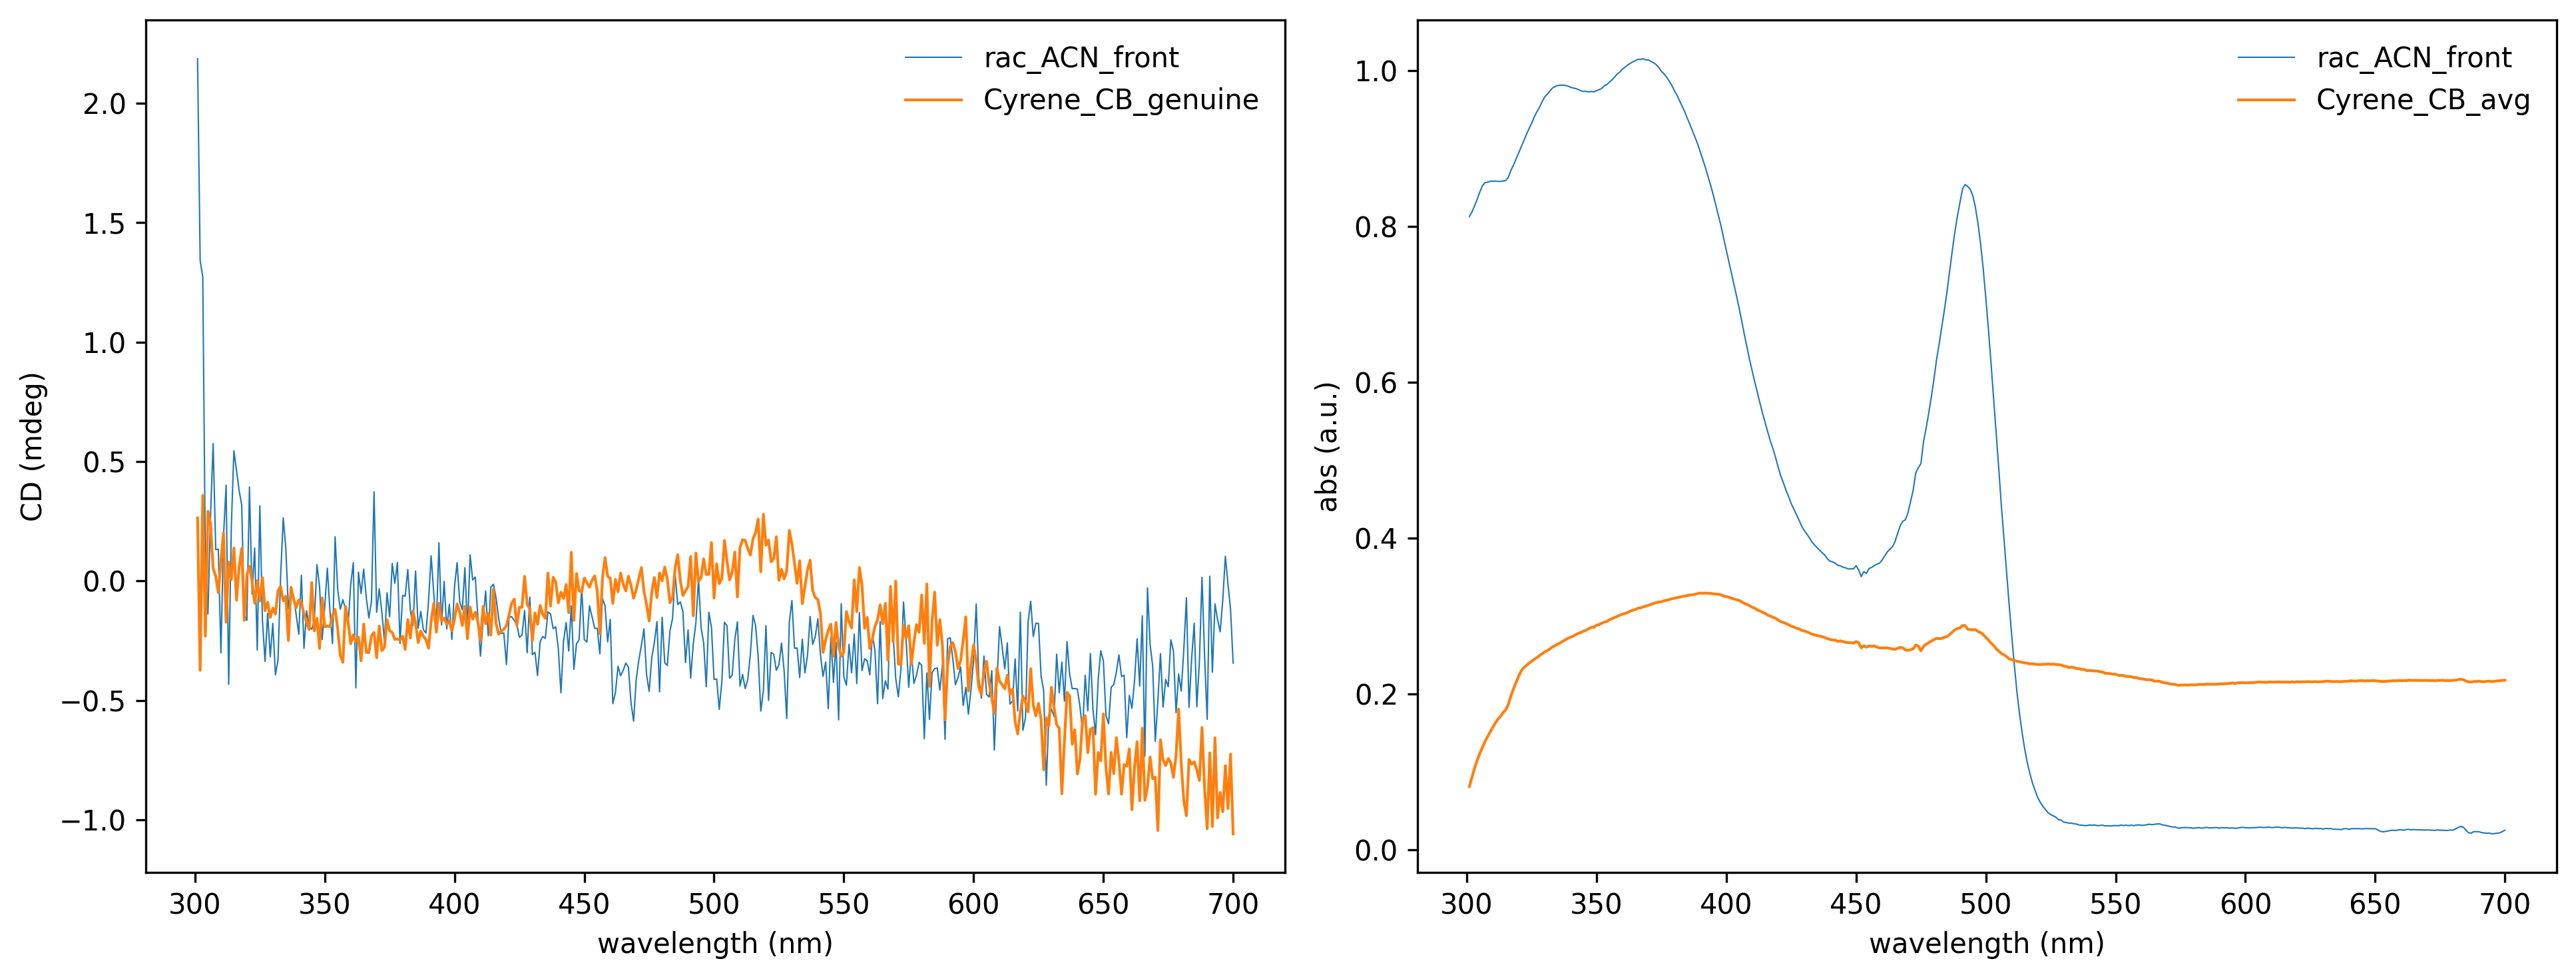

In [11]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(13, 5), dpi=300, layout="tight")

for df in dfs:
    axs[0].plot(df["wavelength"], df["CD"], label=df["name"], lw=0.5)

axs[0].plot(genuine_df["wavelength"], genuine_df["genuine_CD"], label="Cyrene_CB_genuine", lw=1)

handles, labels = axs[0].get_legend_handles_labels()
order = [4, 0, 3, 2, 1, 5]
if len(order) == len(dfs):
    axs[0].legend([handles[idx] for idx in order], [labels[idx] for idx in order], frameon=False)
else:
    axs[0].legend(frameon=False)

axs[0].set_xlabel("wavelength (nm)")
axs[0].set_ylabel("CD (mdeg)")

for df in dfs:
    axs[1].plot(df["wavelength"], df["abs"], label=df["name"], lw=0.5)
    

axs[1].plot(genuine_df["wavelength"], genuine_df["avg_abs"], label="Cyrene_CB_avg", lw=1)

axs[1].legend(frameon=False)
axs[1].set_xlabel("wavelength (nm)")
axs[1].set_ylabel("abs (a.u.)")
# axs[1].set_yscale("log")

fig.savefig(Path(data_dir, "ACN_CB_plot.jpg"))


In [65]:
data_dir = Path(r"G:\My Drive\CD\20250702_S_MeOMBAI")

txt_files = sorted(list(Path(data_dir).glob('*.csv')))

pprint(txt_files)

[WindowsPath('G:/My Drive/CD/20250702_S_MeOMBAI/S_MeOMBAI_back-1.csv'),
 WindowsPath('G:/My Drive/CD/20250702_S_MeOMBAI/S_MeOMBAI_back-2.csv'),
 WindowsPath('G:/My Drive/CD/20250702_S_MeOMBAI/S_MeOMBAI_back-3.csv'),
 WindowsPath('G:/My Drive/CD/20250702_S_MeOMBAI/S_MeOMBAI_back-4.csv'),
 WindowsPath('G:/My Drive/CD/20250702_S_MeOMBAI/S_MeOMBAI_back-5.csv'),
 WindowsPath('G:/My Drive/CD/20250702_S_MeOMBAI/S_MeOMBAI_back-6.csv'),
 WindowsPath('G:/My Drive/CD/20250702_S_MeOMBAI/S_MeOMBAI_back-7.csv'),
 WindowsPath('G:/My Drive/CD/20250702_S_MeOMBAI/S_MeOMBAI_front-1.csv'),
 WindowsPath('G:/My Drive/CD/20250702_S_MeOMBAI/S_MeOMBAI_front-2.csv'),
 WindowsPath('G:/My Drive/CD/20250702_S_MeOMBAI/S_MeOMBAI_front-3.csv'),
 WindowsPath('G:/My Drive/CD/20250702_S_MeOMBAI/S_MeOMBAI_front-4.csv'),
 WindowsPath('G:/My Drive/CD/20250702_S_MeOMBAI/S_MeOMBAI_front-5.csv'),
 WindowsPath('G:/My Drive/CD/20250702_S_MeOMBAI/S_MeOMBAI_front-6.csv'),
 WindowsPath('G:/My Drive/CD/20250702_S_MeOMBAI/S_MeOMBAI_

In [93]:
dfs = []
common_cols = set()
for txt_file in txt_files:
    
    if "front" in txt_file.stem:
        get_col = lambda col: f"front_{col}_{txt_file.stem.replace('_front', '')}"
    elif "back" in txt_file.stem:
        get_col = lambda col: f"back_{col}_{txt_file.stem.replace('_back', '')}"
    else:
        raise ValueError(f"File {txt_file} does not contain 'front' or 'back' in its name.")
    
    common_cols.add(txt_file.stem.replace("_front", "").replace("_back", ""))
    
    df = pd.read_csv(txt_file, sep=",", names=["wavelength", get_col("CD"), get_col("HT"), get_col("abs")], skiprows=21, nrows=400)
    df = df.set_index("wavelength")
    df = df[df.index < 550]
    # df = df[df.index > 470]
    dfs.append(df)

df = pd.concat(dfs, axis=1)

for common_col in sorted(common_cols):
    df[f"gen_CD_{common_col}"] = (df[f"front_CD_{common_col}"] + df[f"back_CD_{common_col}"]) / 2
    df[f"ldlb_CD_{common_col}"] = df[f"front_CD_{common_col}"] - df[f"back_CD_{common_col}"]
    df[f"abs_{common_col}"] = (df[f"front_abs_{common_col}"] + df[f"back_abs_{common_col}"]) / 2
    df[f"g_factor_{common_col}"] = df[f"gen_CD_{common_col}"] / (df[f"abs_{common_col}"] * 32980)


df.head()

,back_CD_S_MeOMBAI-1,back_HT_S_MeOMBAI-1,back_abs_S_MeOMBAI-1,back_CD_S_MeOMBAI-2,back_HT_S_MeOMBAI-2,back_abs_S_MeOMBAI-2,back_CD_S_MeOMBAI-3,back_HT_S_MeOMBAI-3,back_abs_S_MeOMBAI-3,back_CD_S_MeOMBAI-4,...,abs_S_MeOMBAI-5,g_factor_S_MeOMBAI-5,gen_CD_S_MeOMBAI-6,ldlb_CD_S_MeOMBAI-6,abs_S_MeOMBAI-6,g_factor_S_MeOMBAI-6,gen_CD_S_MeOMBAI-7,ldlb_CD_S_MeOMBAI-7,abs_S_MeOMBAI-7,g_factor_S_MeOMBAI-7
wavelength,,,,,,,,,,,,,,,,,,,,,
549.0,1.36561,311.168,0.436532,-0.747938,279.905,0.100456,1.131530,311.896,0.444085,0.957951,...,0.122628,-0.000528,-2.656095,1.04705,0.118045,-0.000682,-1.288205,0.333630,0.132647,-0.000294
548.0,1.24446,310.232,0.436583,-0.944463,279.164,0.101989,0.893760,311.050,0.445087,0.853854,...,0.125368,-0.000549,-2.789820,1.03090,0.120816,-0.000700,-1.311997,0.695307,0.136315,-0.000292
547.0,1.52933,310.046,0.436375,-0.892974,279.090,0.102888,1.215420,310.852,0.444753,0.780329,...,0.127097,-0.000524,-2.910390,0.82852,0.122173,-0.000722,-1.302845,0.443410,0.138791,-0.000285
546.0,1.39126,309.666,0.435586,-0.891158,278.799,0.102816,0.880066,310.496,0.444224,0.613453,...,0.129083,-0.000623,-2.956875,0.84739,0.124138,-0.000722,-1.532730,0.094580,0.141438,-0.000329
545.0,1.13269,308.660,0.436615,-1.126680,277.939,0.104542,0.811428,309.445,0.444798,0.635047,...,0.132566,-0.000555,-3.055810,1.04050,0.127023,-0.000729,-1.488300,0.097720,0.145555,-0.000310


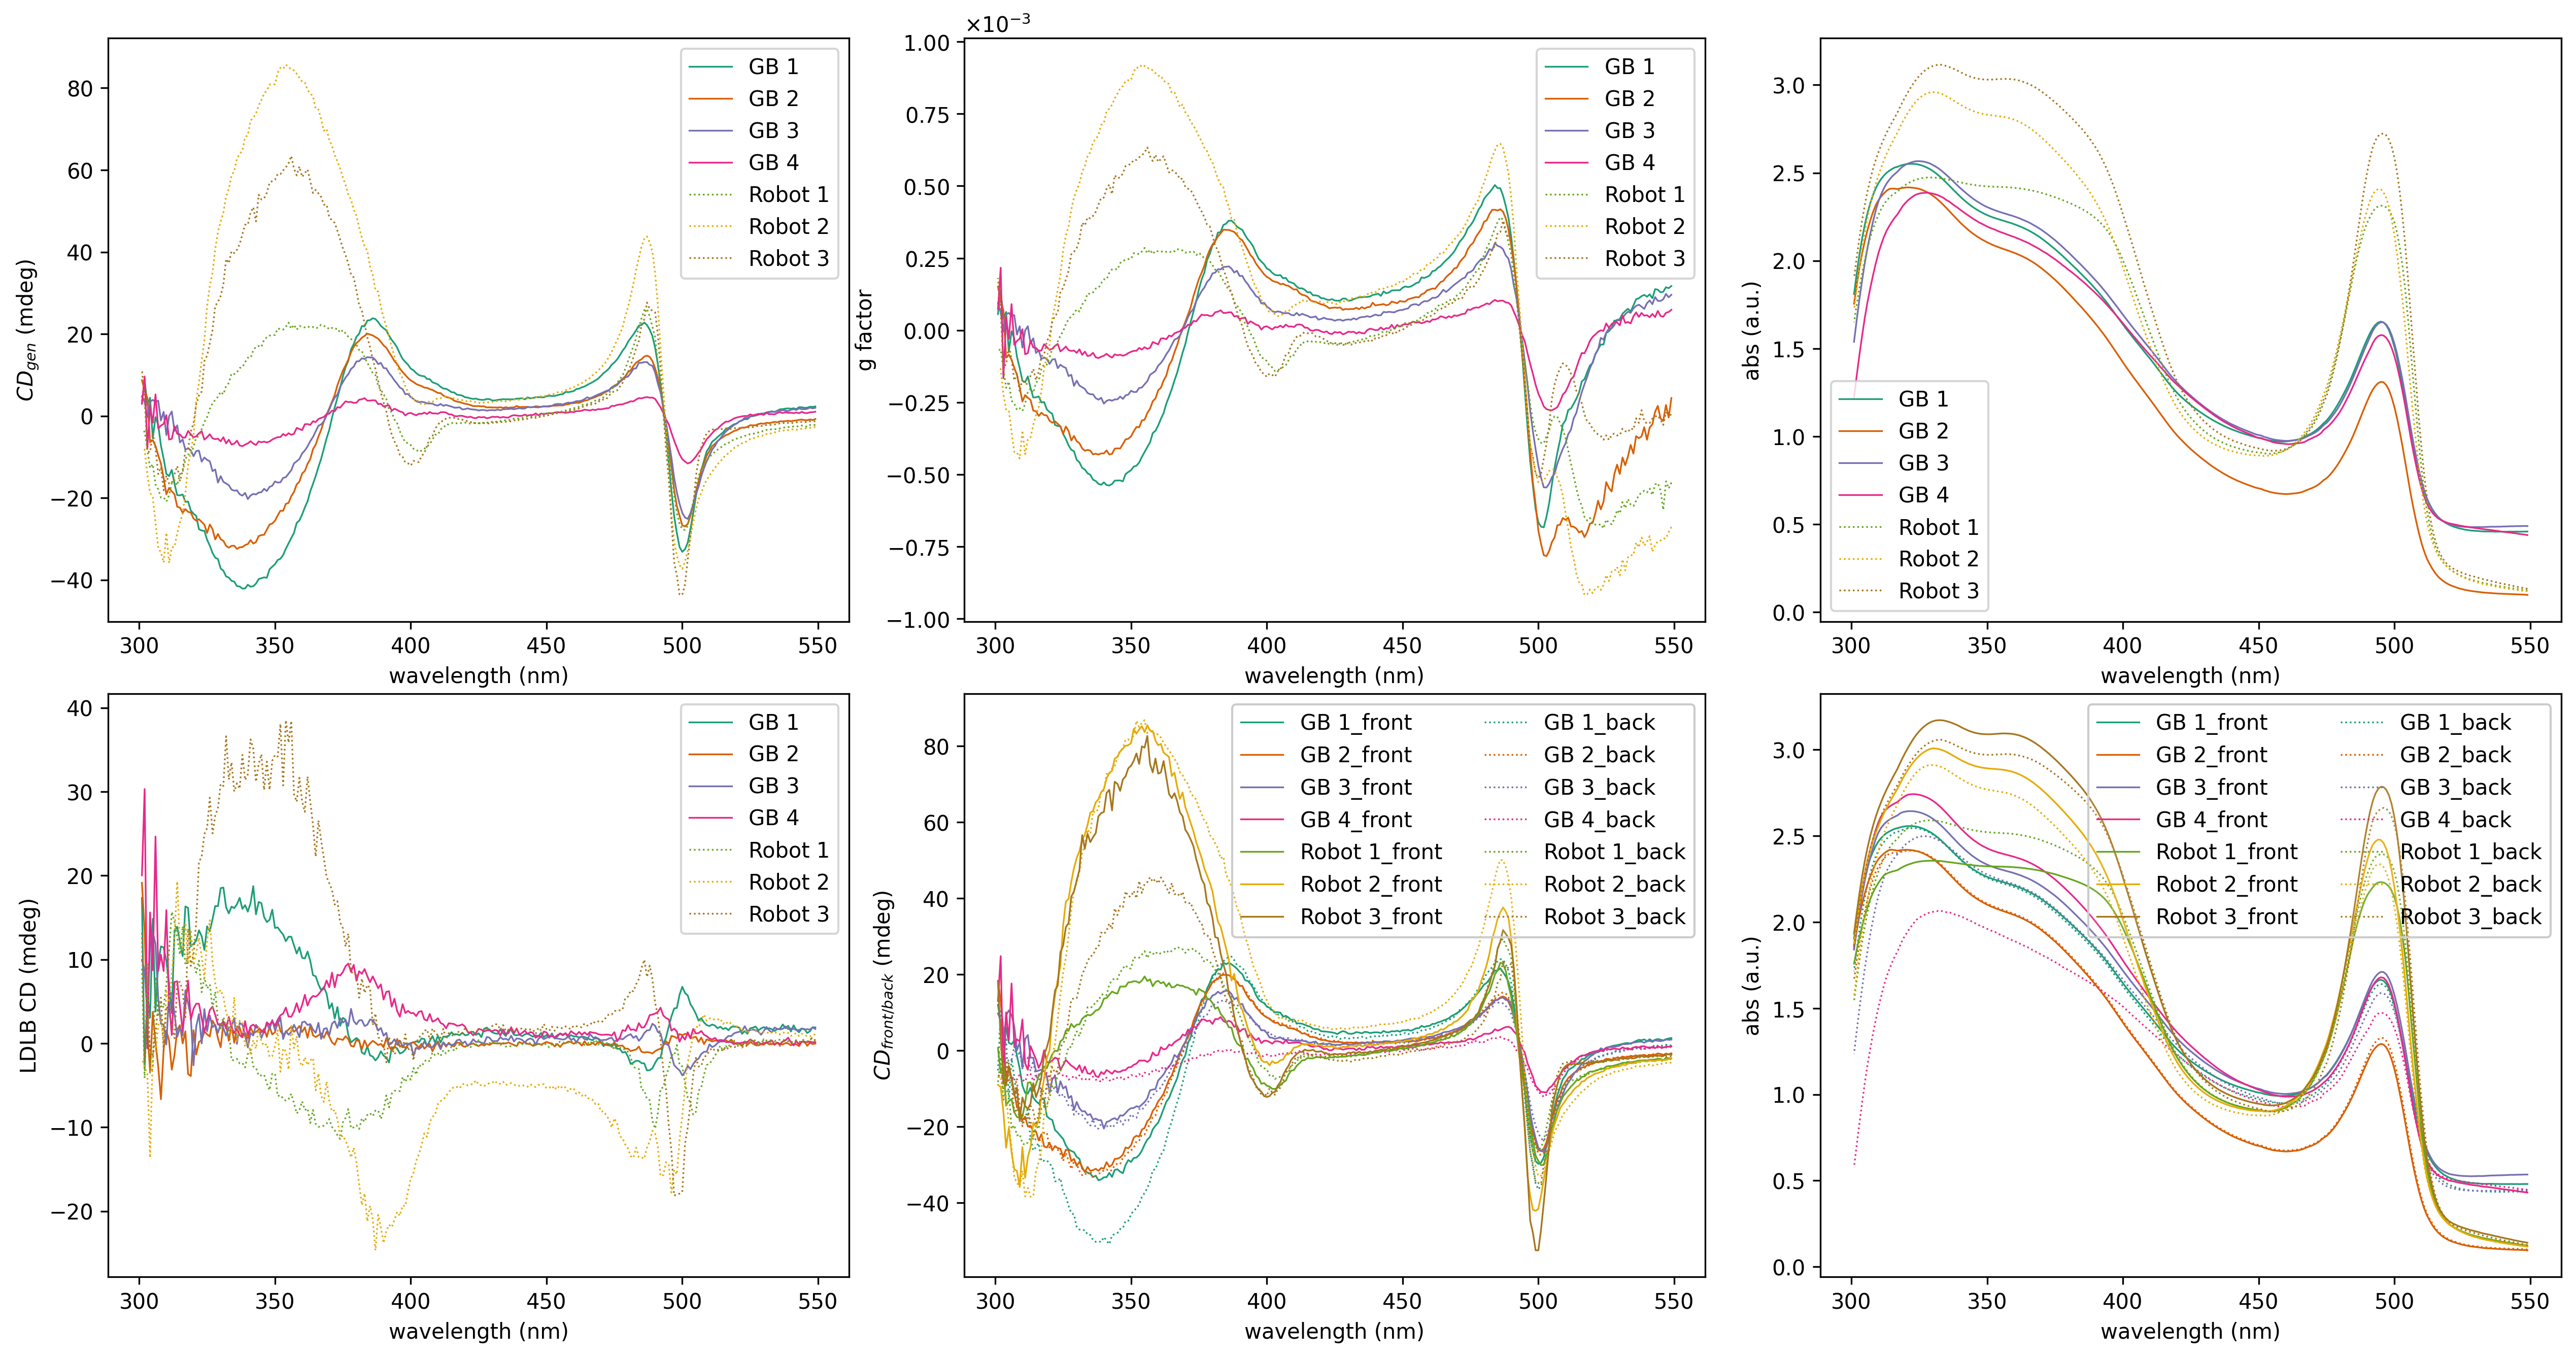

In [108]:
import matplotlib as mpl

def get_label(_name):
    name = _name.replace("CD_", "").replace("HT_", "").replace("abs_", "")

    if name[-1] in ["1", "2", "3", "4"]:
        name = f"GB {name[-1]}"
    
    if name[-1] in ["5", "6", "7"]:
        name = f"Robot {int(name[-1]) - 4}"
    
    return name

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.colormaps.get_cmap("Dark2").colors)

# fig, ((ax_cd_gen, ax_ldlb), (ax_uv_vis, ax_g_factor), (ax_cd, ax_uv_vis_fb)) = plt.subplots(nrows=2, ncols=3, figsize=(17, 10), dpi=300, layout="tight")
fig, ((ax_cd_gen, ax_g_factor, ax_uv_vis), (ax_ldlb, ax_cd, ax_uv_vis_fb)) = plt.subplots(nrows=2, ncols=3, figsize=(17, 9), dpi=300)

for cd_col in [col for col in df.columns if col.startswith("gen_CD_")]:
    df_to_plot = df[[cd_col]].dropna()
    label = get_label(cd_col)
    ax_cd_gen.plot(df_to_plot.index, df_to_plot[cd_col], label=label, lw=0.8, linestyle='-' if label.startswith("GB") else ':')

ax_cd_gen.legend()
ax_cd_gen.set_xlabel("wavelength (nm)")
ax_cd_gen.set_ylabel("$CD_{gen}$ (mdeg)")

for ldlb_col in [col for col in df.columns if col.startswith("ldlb_CD_")]:
    df_to_plot = df[[ldlb_col]].dropna()
    label = get_label(ldlb_col)
    ax_ldlb.plot(df_to_plot.index, df_to_plot[ldlb_col], label=label, lw=0.8, linestyle='-' if label.startswith("GB") else ':')

ax_ldlb.legend()
ax_ldlb.set_xlabel("wavelength (nm)")
ax_ldlb.set_ylabel("LDLB CD (mdeg)")

for abs_col in [col for col in df.columns if col.startswith("abs_")]:
    df_to_plot = df[[abs_col]].dropna()
    label = get_label(abs_col)
    ax_uv_vis.plot(df_to_plot.index, df_to_plot[abs_col], label=label, lw=0.8, linestyle='-' if label.startswith("GB") else ':')

ax_uv_vis.legend()
ax_uv_vis.set_xlabel("wavelength (nm)")
ax_uv_vis.set_ylabel("abs (a.u.)")

for g_factor_col in [col for col in df.columns if col.startswith("g_factor_")]:
    df_to_plot = df[[g_factor_col]].dropna()
    label = get_label(g_factor_col)
    ax_g_factor.plot(df_to_plot.index, df_to_plot[g_factor_col], label=label, lw=0.8, linestyle='-' if label.startswith("GB") else ':')

ax_g_factor.legend()
ax_g_factor.set_xlabel("wavelength (nm)")
ax_g_factor.set_ylabel("g factor")
ax_g_factor.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)

for cd_col in sorted(common_cols):
    front_df_to_plot = df[[f"front_CD_{cd_col}"]].dropna()
    back_df_to_plot = df[[f"back_CD_{cd_col}"]].dropna()
    label = get_label(cd_col)
    front_line = ax_cd.plot(front_df_to_plot.index, front_df_to_plot[f"front_CD_{cd_col}"], label=f"{label}_front", lw=0.8, linestyle='-')
    ax_cd.plot(back_df_to_plot.index, back_df_to_plot[f"back_CD_{cd_col}"], label=f"{label}_back", lw=0.8, linestyle=':', color=front_line[0].get_color())

cd_handles, cd_labels = ax_cd.get_legend_handles_labels()
order = sorted(range(len(labels)), key=lambda i: (i % 2 == 1))
cd_legend = ax_cd.legend(ncols=2, handles=[cd_handles[idx] for idx in order], labels=[cd_labels[idx] for idx in order], framealpha=0)
cd_legend.get_frame().set_alpha(None)
cd_legend.get_frame().set_facecolor((1, 1, 1, 0.1))
ax_cd.set_xlabel("wavelength (nm)")
ax_cd.set_ylabel("$CD_{front/back}$ (mdeg)")

for uv_vis_col in sorted(common_cols):
    front_df_to_plot = df[[f"front_abs_{uv_vis_col}"]].dropna()
    back_df_to_plot = df[[f"back_abs_{uv_vis_col}"]].dropna()
    label = get_label(uv_vis_col)
    front_line = ax_uv_vis_fb.plot(front_df_to_plot.index, front_df_to_plot[f"front_abs_{uv_vis_col}"], label=f"{label}_front", lw=0.8, linestyle='-')
    ax_uv_vis_fb.plot(back_df_to_plot.index, back_df_to_plot[f"back_abs_{uv_vis_col}"], label=f"{label}_back", lw=0.8, linestyle=':', color=front_line[0].get_color())

uv_vis_handles, uv_vis_labels = ax_uv_vis_fb.get_legend_handles_labels()
order = sorted(range(len(uv_vis_labels)), key=lambda i: (i % 2== 1))
uv_vis_legend = ax_uv_vis_fb.legend(ncols=2, handles=[uv_vis_handles[idx] for idx in order], labels=[uv_vis_labels[idx] for idx in order], framealpha=0)
uv_vis_legend.get_frame().set_alpha(None)
uv_vis_legend.get_frame().set_facecolor((1, 1, 1, 0.1))
ax_uv_vis_fb.set_xlabel("wavelength (nm)")
ax_uv_vis_fb.set_ylabel("abs (a.u.)")

# for ax in [ax_cd, ax_uv_vis, ax_g_factor, ax_ldlb, ax_cd_gen, ax_uv_vis_fb]:
    # ax.set_xlim(295, 555)

fig.tight_layout(pad=1.0, w_pad=0.3, h_pad=0.3)

fig.savefig(Path(data_dir, f"{data_dir.stem}.jpg"))
